---------- Crime data loaded successfully! ----------

Preview of first 5 rows:
  Report_Number ReportedDate ReportedTime  Hour DayofWeek ReportedMonth  \
0  PGHP24000024   2024-01-01        00:31     0    Monday           Jan   
1  PGHP24000024   2024-01-01        00:31     0    Monday           Jan   
2  PGHP24000024   2024-01-01        00:31     0    Monday           Jan   
3  PGHP24000024   2024-01-01        00:31     0    Monday           Jan   
4  PGHP24000017   2024-01-01        00:21     0    Monday           Jan   

                           NIBRS_Coded_Offense NIBRS_Offense_Code  \
0                       13A AGGRAVATED ASSAULT                13A   
1                             13C INTIMIDATION                13C   
2                       90Z ALL OTHER OFFENSES                90Z   
3                        23H ALL OTHER LARCENY                23H   
4  9999 Vehicle Offense (Not NIBRS Reportable)                999   

   NIBRS_Offense_Category    NIBRS_Offense_Type NIBRS_

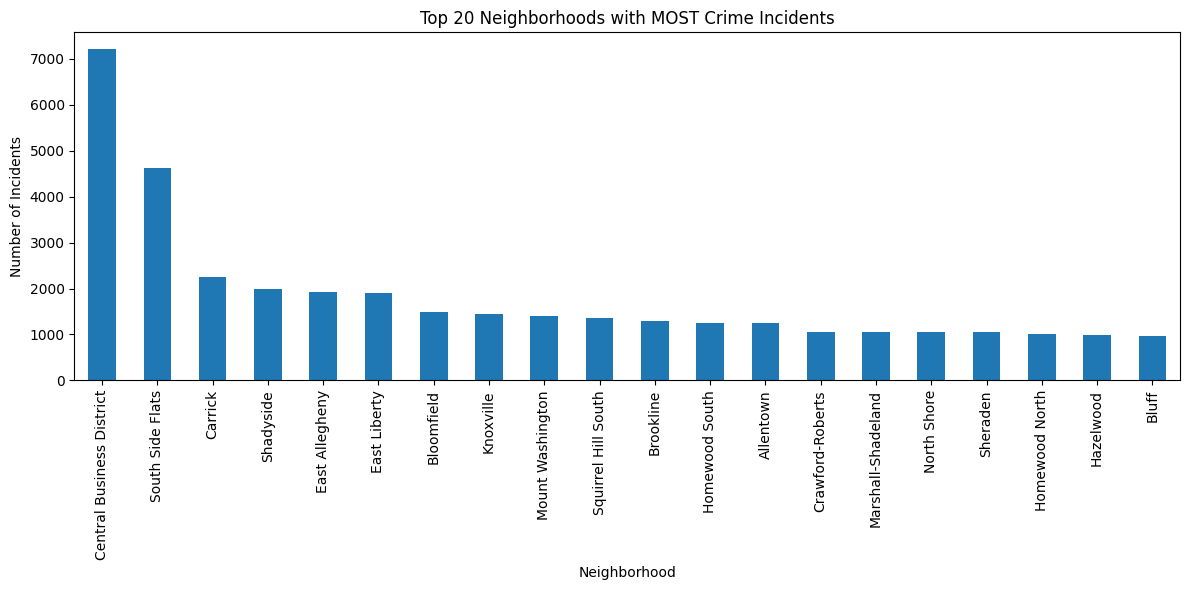

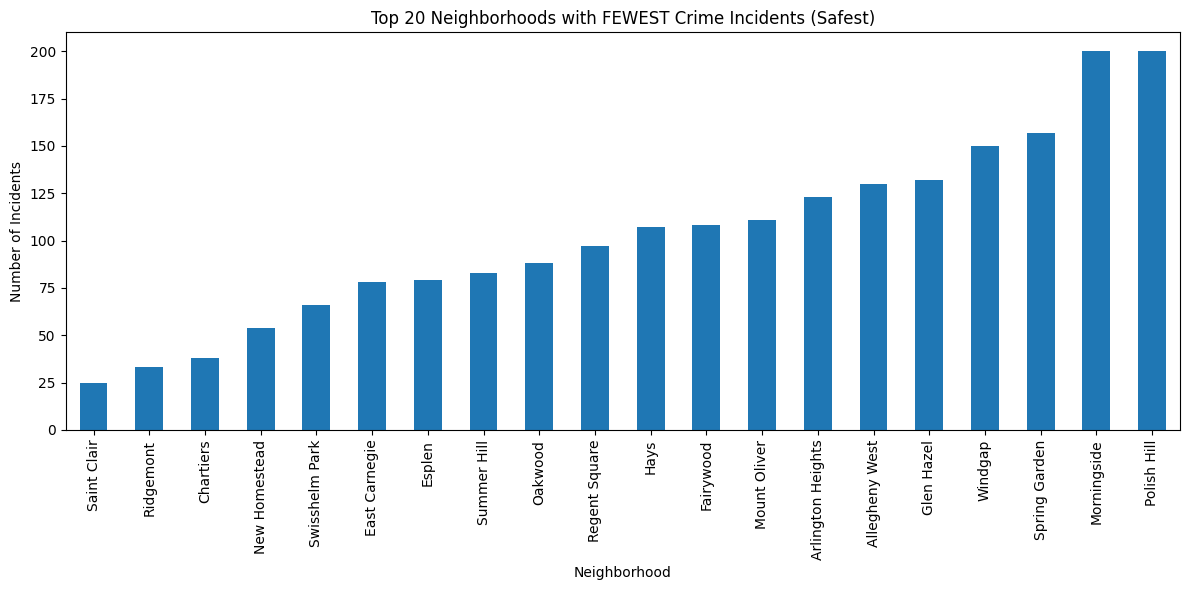

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Set file path (using relative path)
file_path = "../data/2024-October 31, 2025 Monthly Criminal Activity Dataset.xlsx"

# 2. Load crime data
try:
    df_crime = pd.read_excel(file_path)
    print("---------- Crime data loaded successfully! ----------")
    
    # Check the data
    print("\nPreview of first 5 rows:")
    print(df_crime.head())
    
    # 3. Calculate crime counts per neighborhood
    if 'Neighborhood' in df_crime.columns:
        neighborhood_crime_counts = df_crime['Neighborhood'].value_counts()
        print("\n---------- Successfully calculated crime counts per neighborhood ----------")
        
        # 4. Plot: Top 20 neighborhoods with highest crime counts (Least Safe)
        plt.figure(figsize=(12, 6))
        neighborhood_crime_counts.head(20).plot(kind='bar', 
                                               title='Top 20 Neighborhoods with MOST Crime Incidents', 
                                               ylabel='Number of Incidents')
        plt.tight_layout()
        plt.show()
        
        # 5. Plot: Top 20 neighborhoods with lowest crime counts (Safest)
        # Note: Added sort_values(ascending=True) for better visualization
        plt.figure(figsize=(12, 6))
        neighborhood_crime_counts.tail(20).sort_values(ascending=True).plot(kind='bar', 
                                               title='Top 20 Neighborhoods with FEWEST Crime Incidents (Safest)', 
                                               ylabel='Number of Incidents')
        plt.tight_layout()
        plt.show()
        
    else:
        print("Error: 'Neighborhood' column not found in the dataset.")

except FileNotFoundError:
    print(f"Error: File not found. Please check the path: {file_path}")

In [4]:
# Load Population Data
# Ensure the file path is correct for your setup
pop_path = "../data/population_2020.csv" 

try:
    df_pop = pd.read_csv(pop_path)
    print("---------- Population data loaded successfully! ----------")
    
    # FIXED: Use the correct column name '2020_Total_Population'
    print(df_pop[['Neighborhood', '2020_Total_Population']].head())
    
except FileNotFoundError:
    print(f"Error: Population data file not found! Please ensure 'population_2020.csv' is in the data folder.")

---------- Population data loaded successfully! ----------
                               Neighborhood  2020_Total_Population
0                          Allegheny Center                   1419
1                            Allegheny West                    540
2                                 Allentown                   2305
3  Arlington - Arlington Heights (Combined)                   2040
4                                Banksville                   4127



---------- True Winners: Top 20 Neighborhoods with Lowest Crime Rates per Capita ----------
           Neighborhood  Crime_Rate  2020_Total_Population  Crime_Count
79       Swisshelm Park   49.290515                   1339           66
63      Stanton Heights   50.598600                   4427          224
31  Squirrel Hill North   55.307686                  11879          657
80        New Homestead   58.887677                    917           54
66          Morningside   61.500615                   3252          200
64             Westwood   65.426170                   3332          218
27        North Oakland   69.310635                  10691          741
58        Lincoln Place   78.922345                   3155          249
76          Summer Hill   83.166333                    998           83
53           Banksville   83.595832                   4127          345
81            Ridgemont   84.615385                    390           33
75              Oakwood   85.853659        

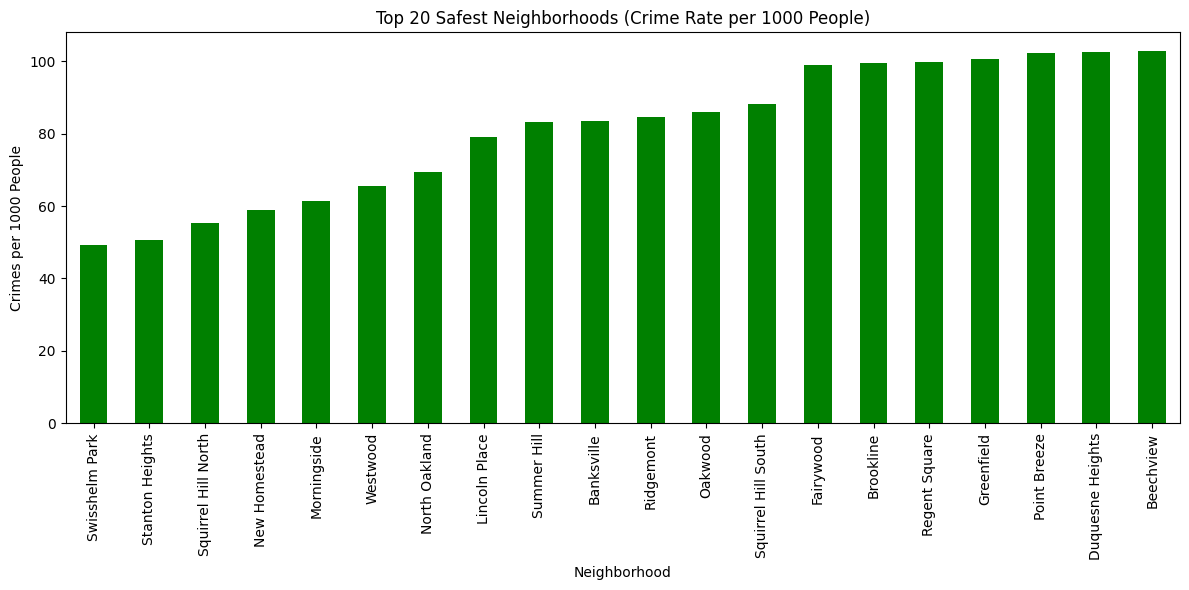

In [5]:
# 3. Merge and Analyze
# Prepare data for merging
crime_df = neighborhood_crime_counts.reset_index()
crime_df.columns = ['Neighborhood', 'Crime_Count']

# Merge crime data with population data
merged_data = pd.merge(crime_df, df_pop, on='Neighborhood', how='inner')

# FIXED: Calculate crime rate using '2020_Total_Population'
# Formula: (Crime Count / Population) * 1000
merged_data['Crime_Rate'] = (merged_data['Crime_Count'] / merged_data['2020_Total_Population']) * 1000

# Sort: Find neighborhoods with the lowest crime rates (Best for retirement)
safest_per_capita = merged_data.sort_values(by='Crime_Rate', ascending=True)

# Display top 20 results
print("\n---------- True Winners: Top 20 Neighborhoods with Lowest Crime Rates per Capita ----------")
print(safest_per_capita[['Neighborhood', 'Crime_Rate', '2020_Total_Population', 'Crime_Count']].head(20))

# Visualization
plt.figure(figsize=(12, 6))
safest_per_capita.set_index('Neighborhood')['Crime_Rate'].head(20).plot(kind='bar', 
                                                                     color='green',
                                                                     title='Top 20 Safest Neighborhoods (Crime Rate per 1000 People)',
                                                                     ylabel='Crimes per 1000 People')
plt.tight_layout()
plt.show()

Neighborhood names have been standardized.

---------- FINAL RANKING: Top 20 Safest Neighborhoods ----------
           Neighborhood  Safety_Score  Serious_Crime_Count  \
73  Squirrel Hill North     21.803182                  259   
79       Swisshelm Park     23.151606                   31   
53        New Homestead     23.991276                   22   
65            Ridgemont     25.641026                   10   
76      Stanton Heights     30.042918                  133   
23     Duquesne Heights     35.043805                   84   
50          Morningside     35.977860                  117   
86             Westwood     36.914766                  123   
44        Lincoln Place     40.570523                  128   
19            Chartiers     40.650407                   20   
54        North Oakland     40.969039                  438   
78          Summer Hill     41.082164                   41   
4            Banksville     42.403683                  175   
74  Squirrel Hill South

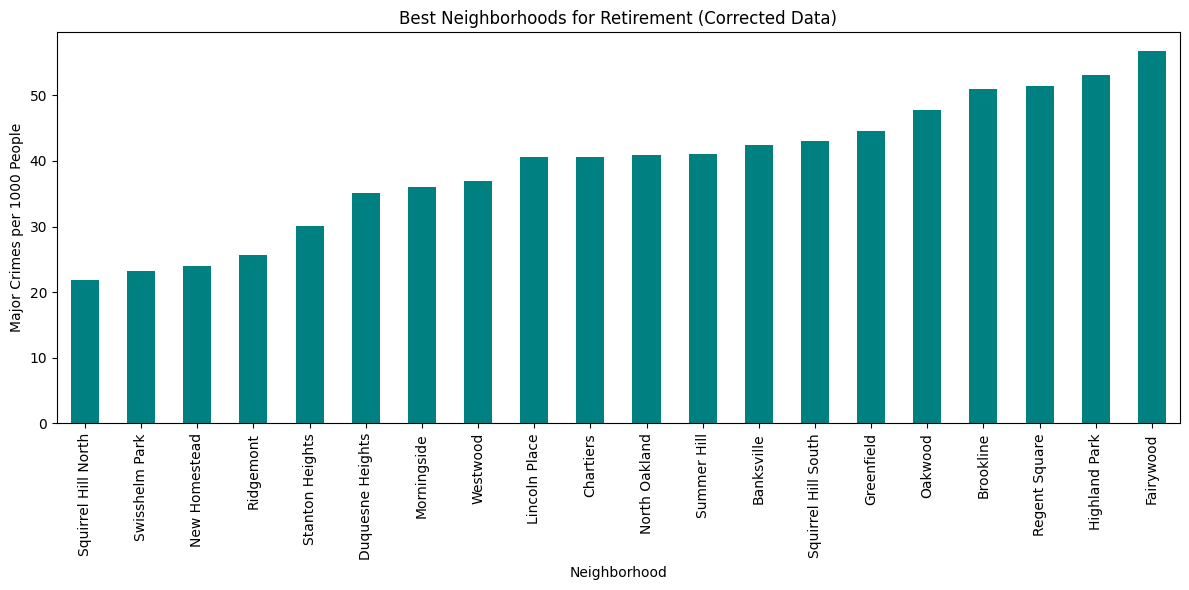

In [6]:
# FINAL Optimized Version ---

# 1. Define the crime list (Violent + Property)
serious_crime_categories = [
    'Assault Offenses', 
    'Burglary/Breaking & Entering', 
    'Robbery',
    'Homicide Offenses',
    'Larceny/Theft Offenses',          
    'Motor Vehicle Theft',             
    'Destruction/Damage/Vandalism of Property',
    'Arson'                            
]

# 2. Filter crime data
df_serious_crime = df_crime[df_crime['NIBRS_Offense_Category'].isin(serious_crime_categories)]
serious_crime_counts = df_serious_crime['Neighborhood'].value_counts().reset_index()
serious_crime_counts.columns = ['Neighborhood', 'Serious_Crime_Count']

# 3. Use a dictionary to map 'Bad Name' (in Pop data) -> 'Good Name' (in Crime data)
name_mapping = {
    'Central Business District (Downtown)': 'Central Business District',
    'Mt. Oliver': 'Mount Oliver',
    'St. Clair': 'Saint Clair',
    'Chartiers City': 'Chartiers',
    'Spring Hill-City': 'Spring Hill–City View', 
    'Arlington - Arlington Heights (Combined)': 'Arlington' 
}

df_pop_fixed = df_pop.copy()
df_pop_fixed['Neighborhood'] = df_pop_fixed['Neighborhood'].replace(name_mapping)

print("Neighborhood names have been standardized.")

# 4. Merge (Using the FIXED population data)
final_data = pd.merge(df_pop_fixed, serious_crime_counts, on='Neighborhood', how='inner')

# 5. Calculate Safety Score
# Filter out tiny populations to avoid infinity/huge numbers
final_data = final_data[final_data['2020_Total_Population'] > 50]

final_data['Safety_Score'] = (final_data['Serious_Crime_Count'] / final_data['2020_Total_Population']) * 1000

# 6. Sort
best_neighborhoods = final_data.sort_values(by='Safety_Score', ascending=True)

print("\n---------- FINAL RANKING: Top 20 Safest Neighborhoods ----------")
print(best_neighborhoods[['Neighborhood', 'Safety_Score', 'Serious_Crime_Count', '2020_Total_Population']].head(20))

# 7. Visualization
plt.figure(figsize=(12, 6))
best_neighborhoods.set_index('Neighborhood')['Safety_Score'].head(20).plot(kind='bar', 
                                                                         color='teal',
                                                                         title='Best Neighborhoods for Retirement (Corrected Data)',
                                                                         ylabel='Major Crimes per 1000 People')
plt.tight_layout()
plt.show()


---------- Z-Standardized Safety Index (0-100, 100 = Safest) ----------
           Neighborhood  Safety_Index_100  Crime_Z_Score  Safety_Score
0   Squirrel Hill North         59.978336      -0.598580     21.803182
1        Swisshelm Park         59.860503      -0.591512     23.151606
2         New Homestead         59.787128      -0.587110     23.991276
3             Ridgemont         59.642963      -0.578462     25.641026
4       Stanton Heights         59.258300      -0.555387     30.042918
5      Duquesne Heights         58.821293      -0.529172     35.043805
6           Morningside         58.739670      -0.524275     35.977860
7              Westwood         58.657797      -0.519364     36.914766
8         Lincoln Place         58.338336      -0.500200     40.570523
9             Chartiers         58.331355      -0.499781     40.650407
10        North Oakland         58.303511      -0.498111     40.969039
11          Summer Hill         58.293626      -0.497518     41.082164
12  

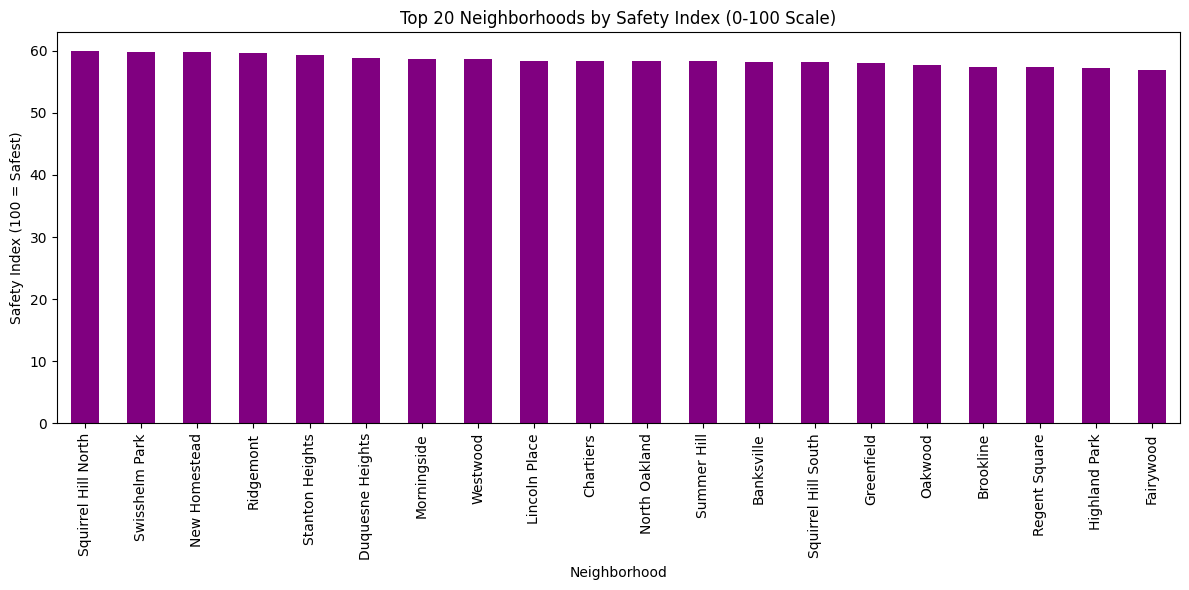

In [7]:
crime_rate_mean = final_data['Safety_Score'].mean()
crime_rate_std = final_data['Safety_Score'].std()

# 创建 Z-score 列
final_data['Crime_Z_Score'] = (final_data['Safety_Score'] - crime_rate_mean) / crime_rate_std

# 2. 映射到 0-100 分 (反向映射)
# 原始 Safety_Score 越低越好（犯罪率低），Z-score 越小越好。
target_mean = 50
target_std = 16.67

# 计算原始分数：Z-score * 16.67 + 50
# 注意这里取了负号 (-final_data['Crime_Z_Score'])，因为低犯罪率(低Z) = 高分
final_data['Safety_Index_100'] = (-final_data['Crime_Z_Score'] * target_std) + target_mean

# 截断到 0-100
final_data['Safety_Index_100'] = final_data['Safety_Index_100'].clip(0, 100)

# 3. 排序 (分数越高越好)
final_ranking = final_data.sort_values(by='Safety_Index_100', ascending=False).reset_index(drop=True)

# 4. 显示结果
print("\n---------- Z-Standardized Safety Index (0-100, 100 = Safest) ----------")
print(final_ranking[['Neighborhood', 'Safety_Index_100', 'Crime_Z_Score', 'Safety_Score']].head(20))

# 5. 可视化新分数
plt.figure(figsize=(12, 6))
# 绘制前 20 名
final_ranking.set_index('Neighborhood')['Safety_Index_100'].head(20).plot(kind='bar', 
                                                                     color='purple',
                                                                     title='Top 20 Neighborhoods by Safety Index (0-100 Scale)',
                                                                     ylabel='Safety Index (100 = Safest)')
plt.tight_layout()
plt.show()

In [10]:
# --- 导出最终结果到 CSV 文件 ---

# 设置导出文件名
output_file = "outputs/Safety_Scores.csv"

# 选择要导出的列 (包括原始数据、人均数据和最终得分)
export_cols = ['Neighborhood', 'Safety_Index_100']

# 执行导出
# index=False 表示不把 pandas 的索引列写入文件
final_ranking[export_cols].to_csv(output_file, index=False)

print(f"\\n成功导出结果到文件: {output_file}")


\n成功导出结果到文件: outputs/Safety_Scores.csv
